In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import product


## 1. What type of cuisine appears the most? (meal_info.csv)

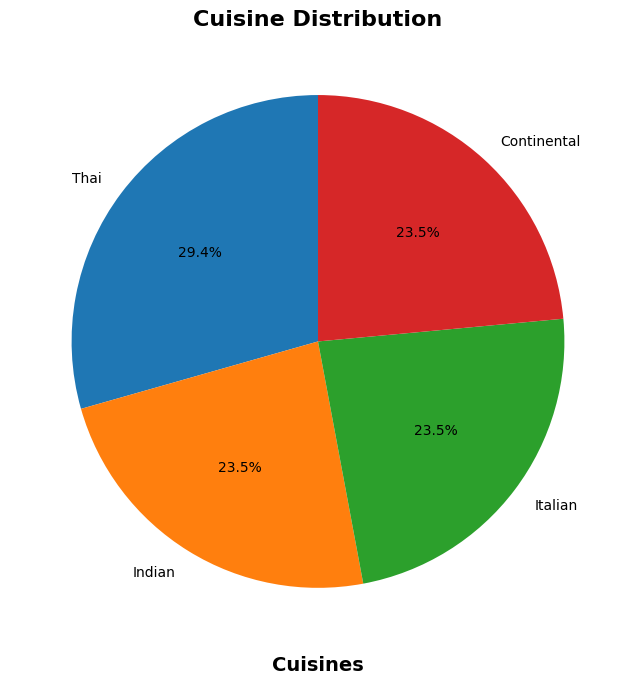

In [ ]:

df = pd.read_csv("Data/meal_info.csv")

# Count the occurrences of each cuisine
cuisine_counts = df["cuisine"].value_counts()

# Plot the pie chart
cuisine_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Add a bold title
plt.title("Cuisine Distribution", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Add a bold x-label 
plt.xlabel("Cuisines", fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Remove y-label for better aesthetics
plt.ylabel("")  

# Display the plot
plt.show()

## 2. Identify the ID's of the meal packages that include a Thai beverage. 

In [6]:
df = pd.read_csv("Data/meal_info.csv")

# check rows where category is "Beverages" and cuisine is "Thai"
thai_beverages = df[(df['category'] == 'Beverages') & (df['cuisine'] == 'Thai')]

# show meal id for Thai Beverages
meal_ids = thai_beverages['meal_id'].tolist()

print("Meal IDs for Thai Beverages:", meal_ids)

Meal IDs for Thai Beverages: [1885, 1993, 2539]


## 3. If a customer wants a Thai beverage and an Italian sandwich, provide two random ID combinations that they could request. 

In [ ]:
df = pd.read_csv("Data/meal_info.csv")

# filter Thai Beverages
thai_beverages = df[(df['category'] == 'Beverages') & (df['cuisine'] == 'Thai')]['meal_id'].tolist()

# filter Italian Sandwiches
italian_sandwiches = df[(df['category'] == 'Sandwich') & (df['cuisine'] == 'Italian')]['meal_id'].tolist()

# generate possible pairings
combinations = list(product(thai_beverages, italian_sandwiches))

# select 2 random combinations
random_combos = random.sample(combinations, 2)

# convert to a DataFrame for display
combo_df = pd.DataFrame(random_combos, columns=['Thai Beverage ID', 'Italian Sandwich ID'])

print(combo_df)

   Thai Beverage ID  Italian Sandwich ID
0              1885                 1754
1              1885                 1971


## 4. Which food catagories are exclusive to one type of cuisine? Which ones are non exclusive? 

In [40]:
df = pd.read_csv("Data/meal_info.csv")

# group by category and count unique cuisines
category_cuisine_counts = df.groupby('category')['cuisine'].nunique()

# exclusive categories (only one cuisine)
exclusive_categories = category_cuisine_counts[category_cuisine_counts == 1].index.tolist()
exclusive_df = df[df['category'].isin(exclusive_categories)][['category', 'cuisine']].drop_duplicates()
# capitalize headers
exclusive_df.columns = ['Category:', 'Cuisine:']  

print("Categories Exclusive to One Cuisine:\n")
print(exclusive_df)

# non-exclusive categories (multiple cuisines)
non_exclusive_categories = category_cuisine_counts[category_cuisine_counts > 1].index.tolist()
non_exclusive_df = df[df['category'].isin(non_exclusive_categories)][['category', 'cuisine']].drop_duplicates()
# capitalize headers
non_exclusive_df.columns = ['Category:', 'Cuisine:']  

print("\n Categories NOT Exclusive to One Cuisine:\n")
print(non_exclusive_df)

Categories Exclusive to One Cuisine:

       Category:     Cuisine:
5         Extras         Thai
11          Soup         Thai
14  Other Snacks         Thai
15         Salad      Italian
16     Rice Bowl       Indian
20      Starters         Thai
23      Sandwich      Italian
25         Pasta      Italian
33        Desert       Indian
36       Biryani       Indian
42         Pizza  Continental
45          Fish  Continental
48       Seafood  Continental

 Categories NOT Exclusive to One Cuisine:

    Category:     Cuisine:
0   Beverages         Thai
3   Beverages       Indian
6   Beverages      Italian
30  Beverages  Continental


## 5. Which city code has the most Type C fulfilment centers?

In [13]:
df = pd.read_csv("Data/fulfilment_center_info.csv")

# Filter for Type_A centers
type_c_centers = df[df['center_type'] == 'TYPE_C']

# Count the number of Type_A centers per city code
city_code_counts = type_c_centers['city_code'].value_counts()

# Get the city code with the most Type_A centers
most_type_c_city_code = city_code_counts.idxmax()
most_type_c_count = city_code_counts.max()

print(f"City code with the most Type_C fulfilment centers: {most_type_c_city_code} (Count: {most_type_c_count})")

City code with the most Type_C fulfilment centers: 526 (Count: 4)


## 6. Find the most common center type. What region has the most fulfilment centers and do any of them share the same city code?

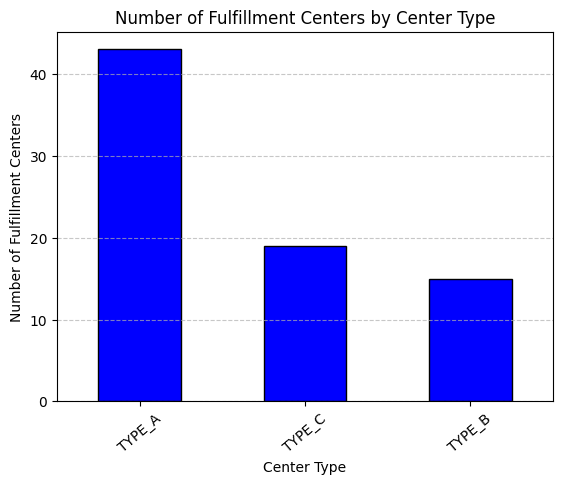

Region with the most fulfillment centers: 56
Number of fulfillment centers in region 56: 30

Duplicate city codes and their counts in this region:
city_code
590    9
638    3
647    2
604    2
522    2
517    2
Name: count, dtype: int64


In [19]:
df = pd.read_csv("Data/fulfilment_center_info.csv")

# count the number of fulfillment centers for each center type
center_type_counts = df['center_type'].value_counts()

# plot the counts as a bar chart
center_type_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel("Center Type")
plt.ylabel("Number of Fulfillment Centers")
plt.title("Number of Fulfillment Centers by Center Type")


# format chart 
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.show()

# find the region with the most fulfillment centers
region_counts = df['region_code'].value_counts()
most_centers_region = region_counts.idxmax()

# filter for centers in the region with the most fulfillment centers
centers_in_region = df[df['region_code'] == most_centers_region]

# check for duplicate city codes in that region
duplicate_city_codes = centers_in_region['city_code'].duplicated(keep=False)
duplicate_centers = centers_in_region[duplicate_city_codes]

# output the results
print(f"Region with the most fulfillment centers: {most_centers_region}")
print(f"Number of fulfillment centers in region {most_centers_region}: {region_counts[most_centers_region]}")
if not duplicate_centers.empty:
    print("\nDuplicate city codes and their counts in this region:")
    print(duplicate_centers['city_code'].value_counts())
else:
    print("\nNo duplicate city codes in this region.")

